In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
import matplotlib.pyplot as plt

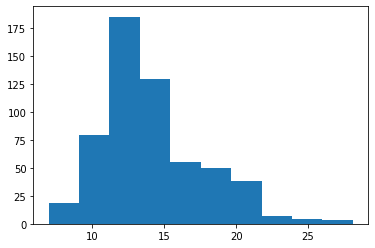

In [5]:
results = plt.hist(data['radius_mean'])

In [6]:
results[0]

array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.])

In [7]:
[ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]

[6.981,
 9.0939,
 11.2068,
 13.3197,
 15.4326,
 17.5455,
 19.6584,
 21.7713,
 23.8842,
 25.9971,
 28.11]

In [8]:
(9.0939-6.981)/2

1.05645

In [9]:
6.981 + 1.05645

8.03745

In [10]:
9.0939 + 1.05645

10.15035

In [11]:
11.2068 + 1.05645

12.26325

In [12]:
13.3197 + 1.05645

14.376149999999999

In [13]:
15.4326 + 1.05645

16.48905

In [14]:
17.5455 + 1.05645

18.601950000000002

In [15]:
19.6584 + 1.05645

20.71485

In [16]:
21.7713 + 1.05645

22.82775

In [17]:
23.8842 + 1.05645

24.940649999999998

In [18]:
25.9971 + 1.05645

27.05355

Text(0, 0.5, 'Frequency')

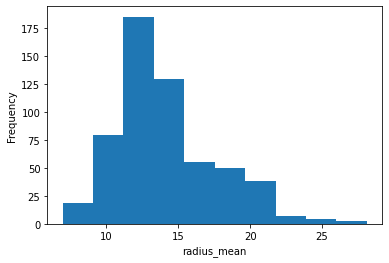

In [19]:
plt.hist(data['radius_mean'])

plt.xlabel("radius_mean")

plt.ylabel("Frequency")

In [20]:
Xis = np.array([8.03745, 10.15035, 12.26325, 14.376149999999999, 16.48905, 18.601950000000002, 20.71485, 22.82775, 24.940649999999998, 27.05355])

In [21]:
import scipy.stats as s

In [22]:
P_X_equals_Xi = s.norm.pdf(Xis, data['radius_mean'].mean(), data['radius_mean'].std())

In [23]:
P_X_equals_Xi

array([0.02543368, 0.05988543, 0.09842676, 0.11292375, 0.09043519,
       0.05055565, 0.01972795, 0.00537371, 0.00102175, 0.00013561])

In [24]:
Eis_normal = data.shape[0]*P_X_equals_Xi

In [25]:
Eis_normal

array([14.47176349, 34.07480844, 56.00482623, 64.25361245, 51.45762164,
       28.76616277, 11.22520348,  3.05764158,  0.58137853,  0.07716342])

In [26]:
s.chisquare(f_obs=results[0],f_exp=Eis_normal)

Power_divergenceResult(statistic=638.6833121569812, pvalue=1.0368172186725668e-131)

In [27]:
P_X_equals_Xis_rayleigh = s.rayleigh.pdf(Xis,loc=0,scale=12.26325)

In [28]:
P_X_equals_Xis_rayleigh

array([0.04311506, 0.04791851, 0.04945921, 0.04808517, 0.04440162,
       0.03914749, 0.03307328, 0.02684209, 0.02096652, 0.01578396])

In [29]:
Eis_rayleigh = data.shape[0]*P_X_equals_Xis_rayleigh

In [30]:
Eis_rayleigh

array([24.53247023, 27.26563433, 28.14229061, 27.36046107, 25.26452206,
       22.27492456, 18.81869746, 15.27314781, 11.92994869,  8.98107063])

In [31]:
s.chisquare(f_obs=results[0], f_exp=Eis_rayleigh)

Power_divergenceResult(statistic=1454.0598790369463, pvalue=1.6098698402731834e-307)